It is now possible to collect a large amount of data about personal movement using activity monitoring devices such as a Fitbit, Nike Fuelband, or Jawbone Up. These type of devices are part of the “quantified self” movement – a group of enthusiasts who take measurements about themselves regularly to improve their health, to find patterns in their behavior, or because they are tech geeks. But these data remain under-utilized both because the raw data are hard to obtain and there is a lack of statistical methods and software for processing and interpreting the data.

This assignment makes use of data from a personal activity monitoring device. This device collects data at 5 minute intervals through out the day. The data consists of two months of data from an anonymous individual collected during the months of October and November, 2012 and include the number of steps taken in 5 minute intervals each day.

The data for this assignment can be downloaded from the course web site:
* Dataset: [Activity monitoring data](https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip)

The variables included in this dataset are:

* `steps`: Number of steps taking in a 5-minute interval (missing values are coded as NA)
* `date`: The date on which the measurement was taken in YYYY-MM-DD format
* `interval`: Identifier for the 5-minute interval in which measurement was taken

The dataset is stored in a comma-separated-value (CSV) file and there are a total of 17,568 observations in this dataset.

**Asignment**

Loading and preprocessing the data

Show any code that is needed to

1. Load the data (i.e. `read.csv()`)
2. Process/transform the data (if necessary) into a format suitable for your analysis

What is mean total number of steps taken per day?

For this part of the assignment, you can ignore the missing values in the dataset.

1. Calculate the total number of steps taken per day
2. If you do not understand the difference between a histogram and a barplot, research the difference between them. Make a histogram of the total number of steps taken each day
3. Calculate and report the mean and median of the total number of steps taken per day

What is the average daily activity pattern?

1. Make a time series plot (i.e. `type="l"`) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all days (y-axis)
2. Which 5-minute interval, on average across all the days in the dataset, contains the maximum number of steps?

Imputing missing values

Note that there are a number of days/intervals where there are missing values (coded as `NA`). The presence of missing days may introduce bias into some calculations or summaries of the data.

1. Calculate and report the total number of missing values in the dataset (i.e. the total number of rows with NAs)
2. Devise a strategy for filling in all of the missing values in the dataset. The strategy does not need to be sophisticated. For example, you could use the mean/median for that day, or the mean for that 5-minute interval, etc.
3. Create a new dataset that is equal to the original dataset but with the missing data filled in.
4. Make a histogram of the total number of steps taken each day and Calculate and report the mean and median total number of steps taken per day. Do these values differ from the estimates from the first part of the assignment? What is the impact of imputing missing data on the estimates of the total daily number of steps?

Are there differences in activity patterns between weekdays and weekends?

For this part the `weekdays()` function may be of some help here. Use the dataset with the filled-in missing values for this part.

1. Create a new factor variable in the dataset with two levels – “weekday” and “weekend” indicating whether a given date is a weekday or weekend day.
2. Make a panel plot containing a time series plot (i.e. `type="l"`) of the 5-minute interval (x-axis) and the average number of steps taken, averaged across all weekday days or weekend days (y-axis). See the README file in the GitHub repository to see an example of what this plot should look like using simulated data.

**Data preparation**

In [1]:
if(!file.exists('./data')){dir.create('./data')}
# download the dataset
url <- 'https://d396qusza40orc.cloudfront.net/repdata%2Fdata%2Factivity.zip'

download.file(url = url, destfile = './data/activity.zip', method = 'curl')

# unzip it
unzip(zipfile = './data/activity.zip', exdir = './data')
list.files('./data')

[1] "activity.csv" "activity.zip"

In [2]:
activity <- read.csv(file = './data/activity.csv')
head(activity)

steps,date,interval
<int>,<fct>,<int>
NA,2012-10-01,0
NA,2012-10-01,5
NA,2012-10-01,10
NA,2012-10-01,15
NA,2012-10-01,20
NA,2012-10-01,25


In [3]:
summary(activity)

     steps                date          interval     
 Min.   :  0.00   2012-10-01:  288   Min.   :   0.0  
 1st Qu.:  0.00   2012-10-02:  288   1st Qu.: 588.8  
 Median :  0.00   2012-10-03:  288   Median :1177.5  
 Mean   : 37.38   2012-10-04:  288   Mean   :1177.5  
 3rd Qu.: 12.00   2012-10-05:  288   3rd Qu.:1766.2  
 Max.   :806.00   2012-10-06:  288   Max.   :2355.0  
 NA's   :2304     (Other)   :15840                   

**What is mean total number of steps taken per day?**

In [12]:
step_per_day <- with(activity, tapply(steps, date, sum, na.rm=TRUE))
head(step_per_day)
class(step_per_day)

2012-10-01 2012-10-02 2012-10-03 2012-10-04 2012-10-05 2012-10-06 
         0        126      11352      12116      13294      15420

[1] "array"

In [11]:
library(ggplot2)

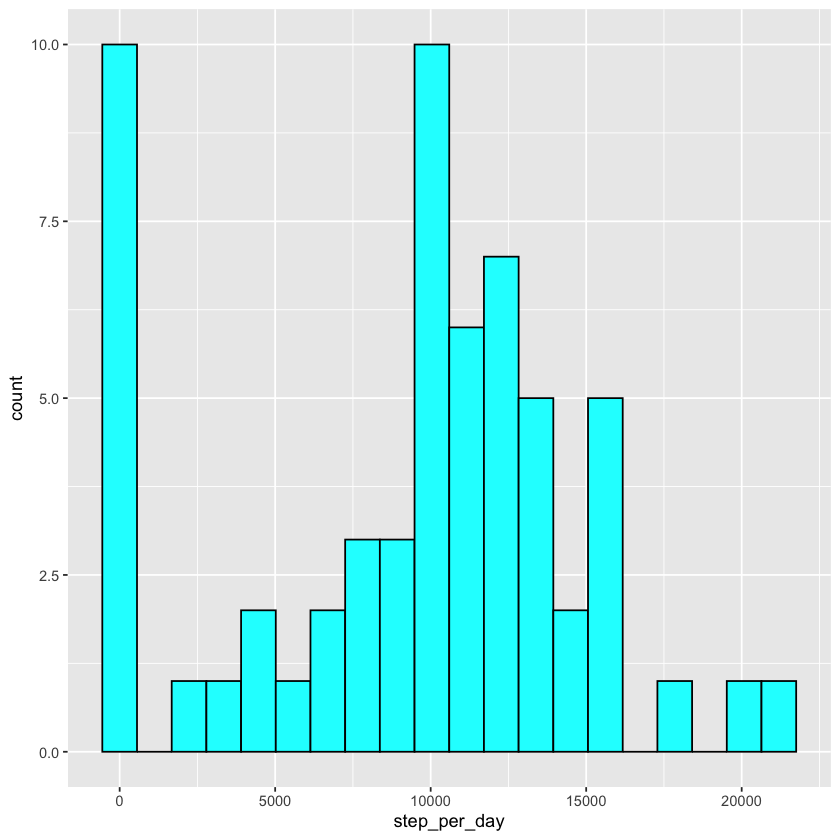

In [25]:
#histogram
df <- data.frame(step_per_day)
ggplot(df, aes(x=step_per_day)) + 
  geom_histogram(color="black", fill="cyan", bins = 20)

There are 10 days with wihout any activites, most day has 10000 to 16000 steps.

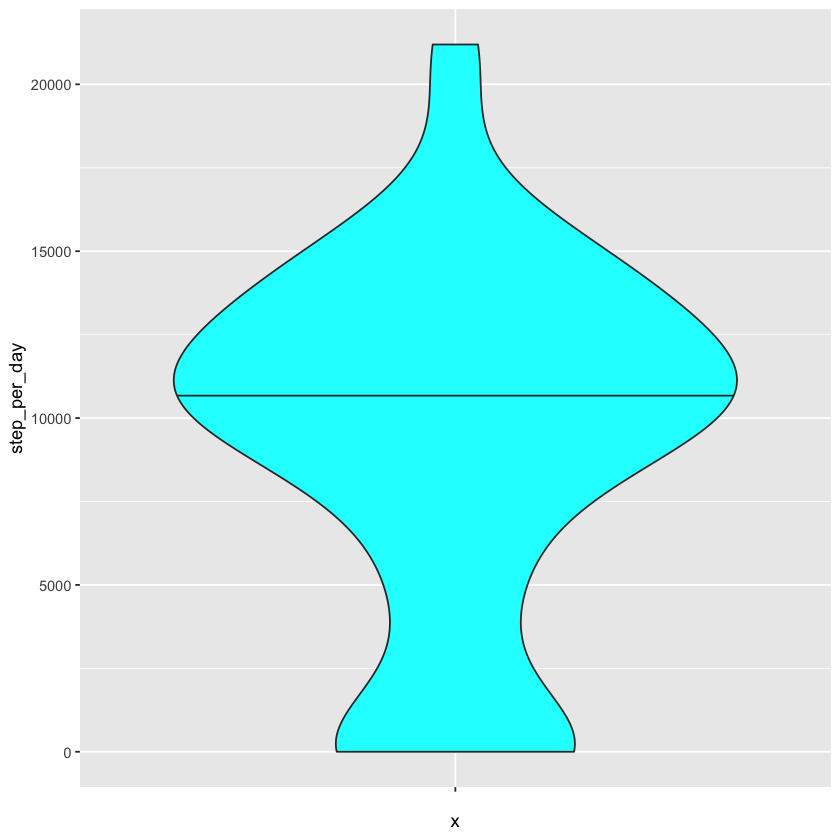

In [38]:
# Violin plot to show mean and median
ggplot(df, aes(x = '', y=step_per_day)) + geom_violin(fill = "cyan", draw_quantiles = c(0.5))

In [40]:
# mean and median
mean(step_per_day)
median(step_per_day)

[1] 9354.23

[1] 10395

**What is the average daily activity pattern?**

In [41]:
# Average step per interval
step_per_interval <- with(activity, tapply(steps, interval, mean, na.rm=TRUE))
head(step_per_interval)

0         5        10        15        20        25 
1.7169811 0.3396226 0.1320755 0.1509434 0.0754717 2.0943396

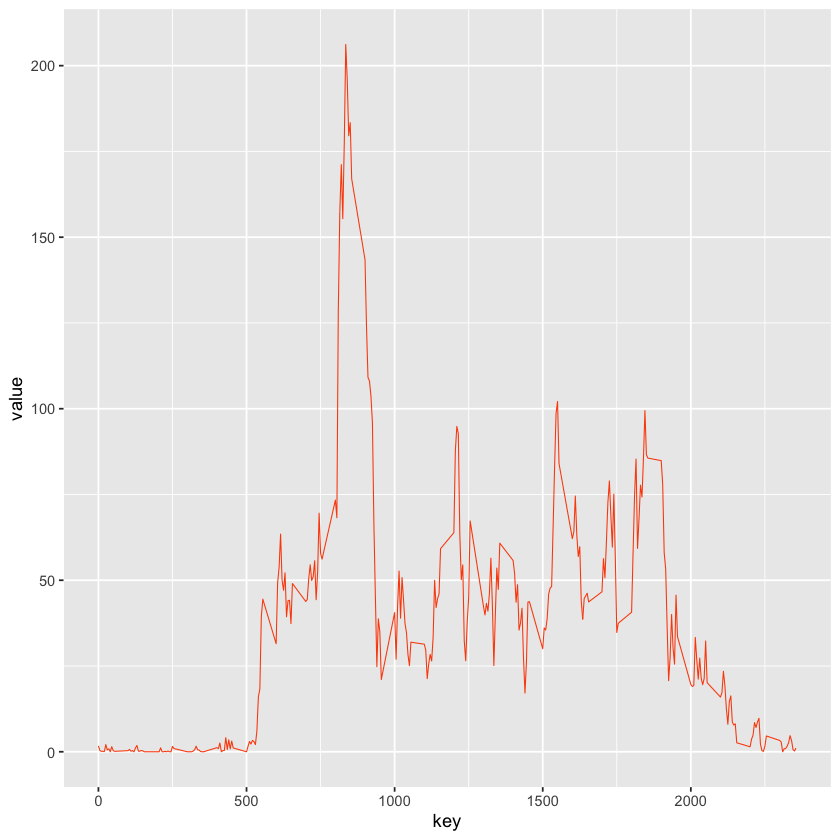

In [63]:
# plot the time series
df <- data.frame(key=as.numeric(names(step_per_interval)), value=step_per_interval)
ggplot(df, aes(x = key, y=value)) + geom_line(color = "#FC4E07", size = .3, group = 1)

No supprise, the subject is the most active during the day, especially in the morning.

In [70]:
df <- data.frame(key=names(step_per_interval), value=step_per_interval)
which.max(df$value)

[1] 104

In [73]:
# The interval with highest number of steps
names(which.max(step_per_interval))

[1] "835"

So on average, interval 835 has the highest number of step

**Imputing missing values**

In [74]:
summary(activity)

     steps                date          interval     
 Min.   :  0.00   2012-10-01:  288   Min.   :   0.0  
 1st Qu.:  0.00   2012-10-02:  288   1st Qu.: 588.8  
 Median :  0.00   2012-10-03:  288   Median :1177.5  
 Mean   : 37.38   2012-10-04:  288   Mean   :1177.5  
 3rd Qu.: 12.00   2012-10-05:  288   3rd Qu.:1766.2  
 Max.   :806.00   2012-10-06:  288   Max.   :2355.0  
 NA's   :2304     (Other)   :15840                   

In [75]:
# the proportion of missing data
mean(is.na(activity$steps))

[1] 0.1311475

So arround 13% of the data is missing.

Use mean of the interval to impute the missing number of step. Better strategy would be using the mean of the same interval in the same day of the week. Let's keep it simple for now.

In [86]:
mean_step_per_interval <- with(activity, tapply(steps, interval, mean, na.rm=TRUE))
mean_step_per_interval <- data.frame(key=names(step_per_interval), value=step_per_interval)
mean_step_per_interval

,key,value
,<fct>,<dbl>
0,0,1.7169811
5,5,0.3396226
10,10,0.1320755
15,15,0.1509434
20,20,0.0754717
25,25,2.0943396
30,30,0.5283019
35,35,0.8679245
40,40,0.0000000


In [100]:
df1 <- data.frame(activity)   
df1 <- merge(x = df1, y = mean_step_per_interval, by.x = 'interval', by.y = 'key')
df1 <- df1[order(df1$date, df1$interval),]
df1

,interval,steps,date,value
,<int>,<int>,<fct>,<dbl>
1,0,NA,2012-10-01,1.7169811
63,5,NA,2012-10-01,0.3396226
128,10,NA,2012-10-01,0.1320755
205,15,NA,2012-10-01,0.1509434
264,20,NA,2012-10-01,0.0754717
327,25,NA,2012-10-01,2.0943396
376,30,NA,2012-10-01,0.5283019
481,35,NA,2012-10-01,0.8679245
495,40,NA,2012-10-01,0.0000000


In [101]:
df1$steps[is.na(df1$step)] <- df1$value[is.na(df1$step)]
df1

,interval,steps,date,value
,<int>,<dbl>,<fct>,<dbl>
1,0,1.7169811,2012-10-01,1.7169811
63,5,0.3396226,2012-10-01,0.3396226
128,10,0.1320755,2012-10-01,0.1320755
205,15,0.1509434,2012-10-01,0.1509434
264,20,0.0754717,2012-10-01,0.0754717
327,25,2.0943396,2012-10-01,2.0943396
376,30,0.5283019,2012-10-01,0.5283019
481,35,0.8679245,2012-10-01,0.8679245
495,40,0.0000000,2012-10-01,0.0000000


In [102]:
imputed <- df1[, c('interval', 'steps', 'date')]
imputed

,interval,steps,date
,<int>,<dbl>,<fct>
1,0,1.7169811,2012-10-01
63,5,0.3396226,2012-10-01
128,10,0.1320755,2012-10-01
205,15,0.1509434,2012-10-01
264,20,0.0754717,2012-10-01
327,25,2.0943396,2012-10-01
376,30,0.5283019,2012-10-01
481,35,0.8679245,2012-10-01
495,40,0.0000000,2012-10-01


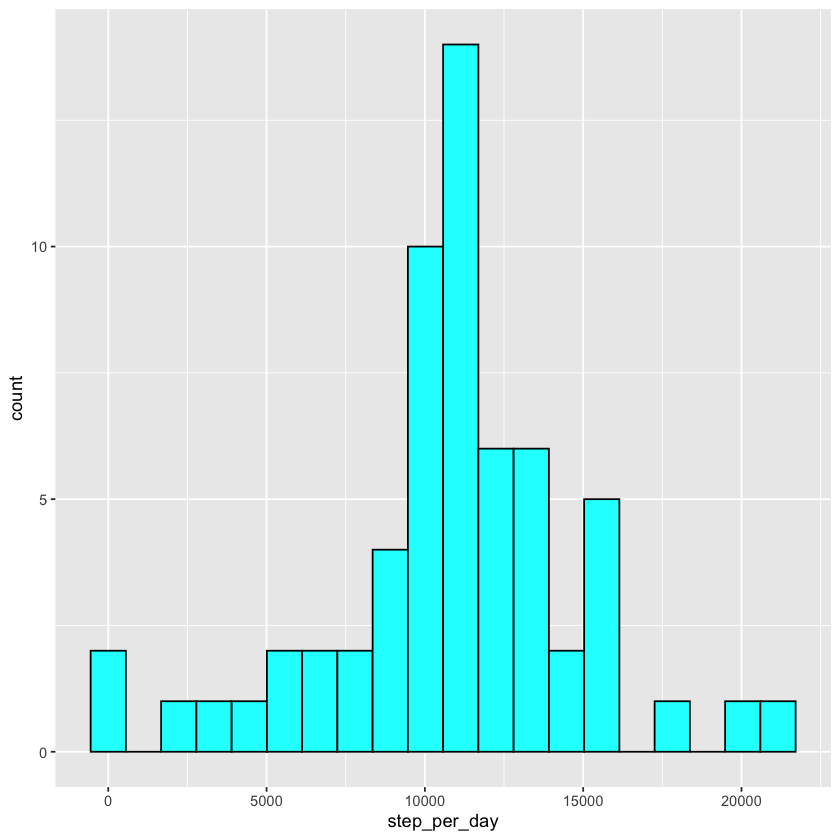

In [103]:
# recalculate the number of steps taken each day
step_per_day <- with(imputed, tapply(steps, date, sum, na.rm=TRUE))
df <- data.frame(step_per_day)
ggplot(df, aes(x=step_per_day)) + 
  geom_histogram(color="black", fill="cyan", bins = 20)

Wow, after imputating, data change alot. I guess alot of days with 0 steps were accounted for by missing data.

**Are there differences in activity patterns between weekdays and weekends?**

In [106]:
imputed$date <- as.Date(as.character(imputed$date), '%Y-%m-%d')
imputed

,interval,steps,date
,<int>,<dbl>,<date>
1,0,1.7169811,2012-10-01
63,5,0.3396226,2012-10-01
128,10,0.1320755,2012-10-01
205,15,0.1509434,2012-10-01
264,20,0.0754717,2012-10-01
327,25,2.0943396,2012-10-01
376,30,0.5283019,2012-10-01
481,35,0.8679245,2012-10-01
495,40,0.0000000,2012-10-01


In [139]:
# add variable that indicate weekay or weekend
imputed$weekday <- as.factor(ifelse(weekdays(imputed$date) %in% c('Saturday', 'Sunday'), 'weekend', 'weekday'))
imputed

,interval,steps,date,weekday
,<int>,<dbl>,<date>,<fct>
1,0,1.7169811,2012-10-01,weekday
63,5,0.3396226,2012-10-01,weekday
128,10,0.1320755,2012-10-01,weekday
205,15,0.1509434,2012-10-01,weekday
264,20,0.0754717,2012-10-01,weekday
327,25,2.0943396,2012-10-01,weekday
376,30,0.5283019,2012-10-01,weekday
481,35,0.8679245,2012-10-01,weekday
495,40,0.0000000,2012-10-01,weekday


In [141]:
# Average step per interval of weekdays and weekend 
weekday <- with(subset(imputed, weekday == 'weekday'), tapply(steps, interval, mean))
weekday_df <- data.frame(key=as.numeric(names(weekday)), value=weekday)

weekend <- with(subset(imputed, weekday == 'weekend'), tapply(steps, interval, mean))
weekend_df <- data.frame(key=as.numeric(names(weekend)), value=weekend)

merged <- merge(x = weekday_df, y = weekend_df, by.x = 'key', by.y = 'key')

library(reshape2)
melted <- melt(merged, id.var = 'key')
melted$variable <- as.factor(ifelse(melted$variable == 'value.x', 'weekday', 'weekend'))
melted <- melted[order(melted$key),]
melted

,key,variable,value
,<dbl>,<fct>,<dbl>
1,0,weekday,2.251153040
289,0,weekend,0.214622642
2,5,weekday,0.445283019
290,5,weekend,0.042452830
3,10,weekday,0.173165618
291,10,weekend,0.016509434
4,15,weekday,0.197903564
292,15,weekend,0.018867925
5,20,weekday,0.098951782


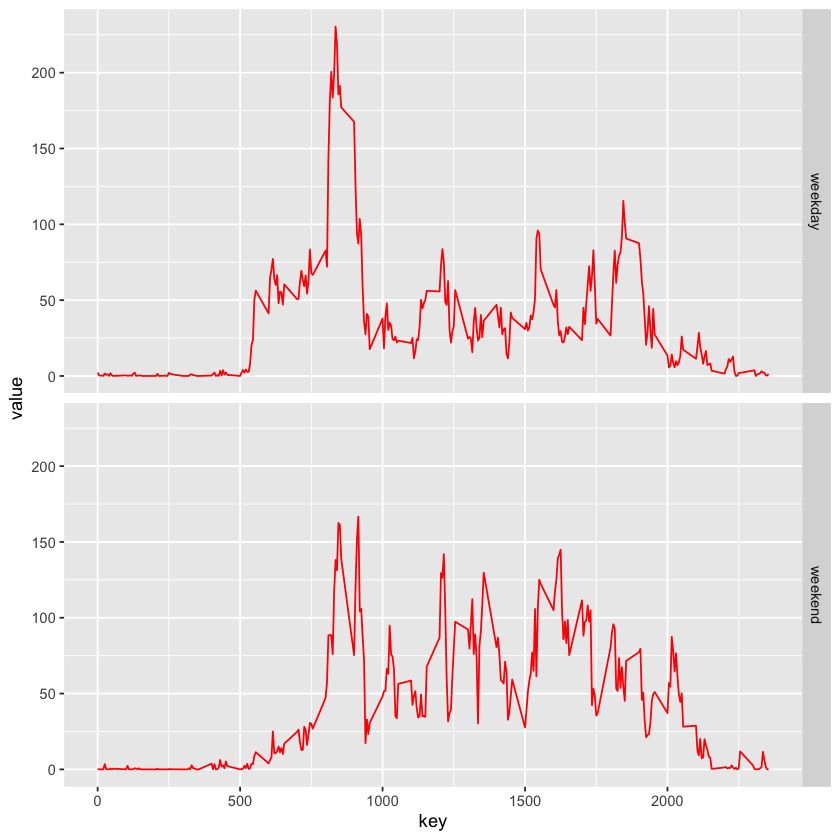

In [155]:
ggplot(melted, aes(x = key, y=value)) + geom_line(col = 'red') + facet_grid(variable ~ .)